# Laboratorio 3 - Data Science

Integrabtesntes:
- Juan Diego Avila 20090
- Diego Franco 20240

## Ejercicio 1


In [3]:
import pandas as pd

test = pd.read_csv('./data/test.csv', delimiter=',')
train = pd.read_csv('./data/train.csv', delimiter=',')

### Analisis exploratorio

In [4]:
print(train.shape)

(42000, 785)


In [5]:
# ver si hay nan
print(train.isnull().sum())

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64


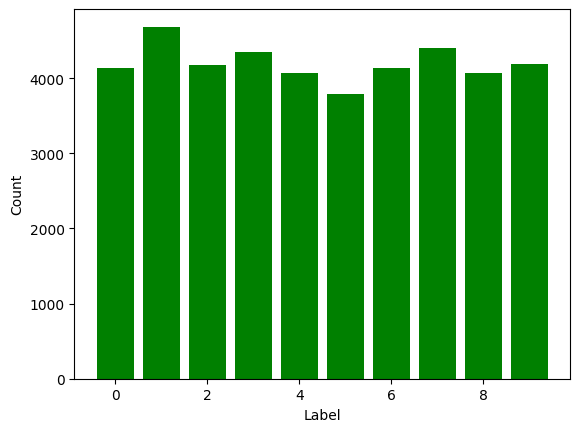

In [6]:
from matplotlib import pyplot as plt

dict = {}

for i in train['label']:
    if i in dict:
        dict[i] += 1
    else:
        dict[i] = 1

plt.bar(dict.keys(), dict.values(), color='g')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


Se puede ver que esta balanceada la cantidad de datos de cada clase, por lo que no es necesario hacer un balanceo de datos.

### Red neuronal simple

Accuracy:  0.9442857142857143


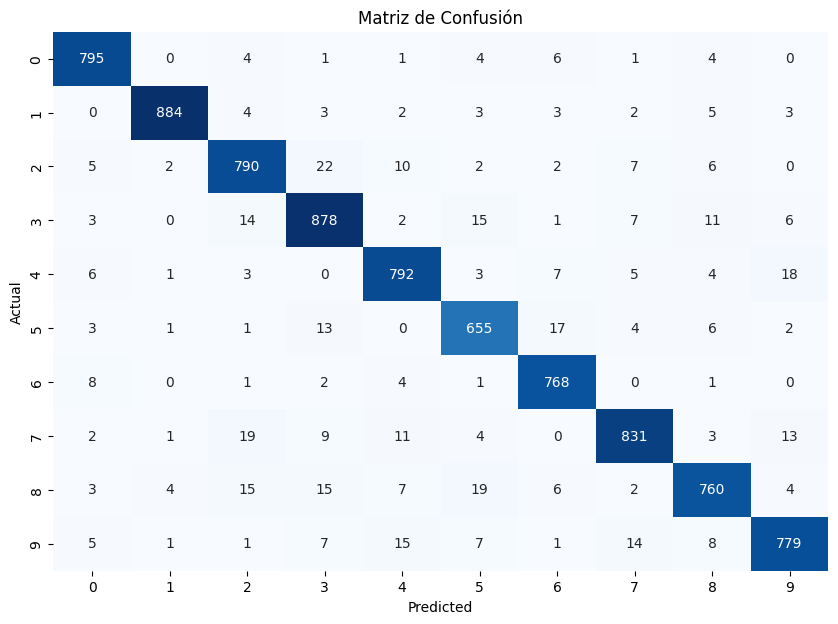

In [8]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


X = train.drop(columns='label').values
y = train['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# param_grid = {
#     'hidden_layer_sizes': [(50,), (100,), (50, 50)]
# }

model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# model = MLPClassifier(max_iter=1000, random_state=42)

# # Realizar la búsqueda en cuadrícula
# grid_search = GridSearchCV(model, param_grid, cv=3, n_jobs=-1)
# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_


# print("Mejores hiperparámetros:", best_params)

y_pred = model.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))


# # Obtener las predicciones del mejor modelo en el conjunto de prueba
# y_pred = best_model.predict(X_test)

# Crear una matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión utilizando seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de Confusión")
plt.show()



Como se puede ver el modelo utilizando hidden_layer_sizes = (50,) tiene un buen accuracy con 0.94. La matriz de confusion muestra que el modelo predice bien en casi todos los casos, pero se equivoca mas prediciendo el 7, 8 y 3.

### Deep Learning

In [ ]:
# import numpy as np
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import DataLoader, TensorDataset
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import accuracy_score


# X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
# y_train_tensor = torch.tensor(y_train, dtype=torch.long)
# X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
# train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# class NeuralNetwork(nn.Module):
#     def __init__(self, input_size, hidden_size, num_classes):
#         super(NeuralNetwork, self).__init__()
#         self.fc1 = nn.Linear(input_size, hidden_size)
#         self.relu = nn.ReLU()
#         self.fc2 = nn.Linear(hidden_size, num_classes)

#     def forward(self, x):
#         out = self.fc1(x)
#         out = self.relu(out)
#         out = self.fc2(out)
#         return out

# def train_and_evaluate(hidden_layer_sizes, activation, alpha, learning_rate_init):
#     input_size = X_train.shape[1]
#     num_classes = len(np.unique(y_train))
#     model = NeuralNetwork(input_size, hidden_layer_sizes, num_classes)
#     model.to(device)
    
#     criterion = nn.CrossEntropyLoss()
#     optimizer = optim.Adam(model.parameters(), lr=learning_rate_init, weight_decay=alpha)
    
#     num_epochs = 10
#     for epoch in range(num_epochs):
#         for inputs, labels in train_loader:
#             inputs, labels = inputs.to(device), labels.to(device)
            
#             optimizer.zero_grad()
#             outputs = model(inputs)
#             loss = criterion(outputs, labels)
#             loss.backward()
#             optimizer.step()
    
#     model.eval()
#     with torch.no_grad():
#         X_test_tensor = X_test_tensor.to(device)
#         y_pred = model(X_test_tensor)
#         _, predicted = torch.max(y_pred, 1)
#         y_pred_cpu = predicted.cpu().numpy()
    
#     accuracy = accuracy_score(y_test, y_pred_cpu)
#     return accuracy

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# param_grid = {
#     'hidden_layer_sizes': [(50,), (100,), (50, 50)]
# }

# grid_search = GridSearchCV(
#     estimator=train_and_evaluate,
#     param_grid=param_grid,
#     cv=3,
#     n_jobs=-1
# )

# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_
# best_accuracy = grid_search.best_score_

# print("Mejores hiperparámetros:", best_params)
# print("Mejor precisión:", best_accuracy)

# best_hidden_layer_sizes = best_params['hidden_layer_sizes']
# best_activation = best_params['activation']
# best_alpha = best_params['alpha']
# best_learning_rate_init = best_params['learning_rate_init']

# best_accuracy, best_confusion = train_and_evaluate(best_hidden_layer_sizes, best_activation, best_alpha, best_learning_rate_init)
# print("Mejor precisión con los mejores hiperparámetros:", best_accuracy)
# print("Matriz de confusión con los mejores hiperparámetros:")
# print(best_confusion)

# unique_labels = np.unique(y_test)
# for label in unique_labels:
#     idx = np.where(unique_labels == label)[0][0]
#     true_positives = best_confusion[idx, idx]
#     false_positives = np.sum(best_confusion[:, idx]) - true_positives
#     false_negatives = np.sum(best_confusion[idx, :]) - true_positives
#     true_negatives = np.sum(best_confusion) - (true_positives + false_positives + false_negatives)
    
#     precision = true_positives / (true_positives + false_positives)
#     recall = true_positives / (true_positives + false_negatives)
#     f1_score = 2 * (precision * recall) / (precision + recall)
    
#     print(f"Para la clase {label}:")
#     print(f"Precisión: {precision:.4f}")
#     print(f"Recall: {recall:.4f}")
#     print(f"F1-Score: {f1_score:.4f}")
#     print("="*40)


###  Otro algoritmo

Random Forest Accuracy: 0.9628571428571429


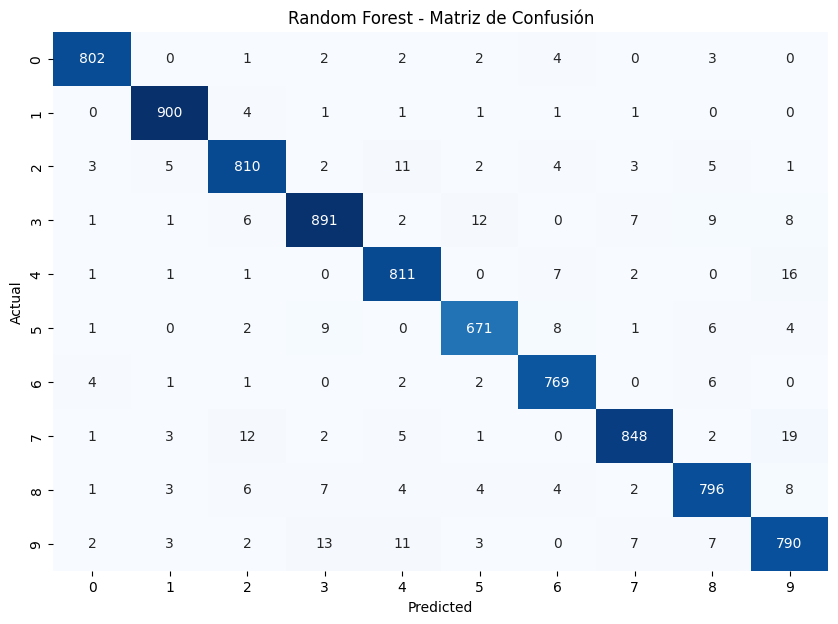

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Crear una instancia del modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo en el conjunto de entrenamiento
rf_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test)

# Calcular y mostrar la precisión del modelo de Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print('Random Forest Accuracy:', accuracy_rf)

# Crear y mostrar la matriz de confusión para el modelo de Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest - Matriz de Confusión")
plt.show()


Como se puede ver el modelo utilizando hidden_layer_sizes = (50,) tiene un buen accuracy con 0.96. La matriz de confusion muestra que el modelo predice bien en casi todos los casos, pero se equivoca mas prediciendo el 9, 4.